<a href="https://colab.research.google.com/github/allisonfowle/ds4002jterm/blob/main/Final2ndDSWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Amazon Fashion Reviews to Predict Product Ratings
## Background
With the importance of ratings and reviews in consumer browsing and purchases, Amazon uses ML models to filter and accentuate particular reviews over others. This allows for optimal use to the consumer as well as improves user experience in navigating product details. Especially, after a case of false reviews, Amazon sued several operators for their deceptive violations in obtaining profits by interfering with product reviews and inflating ratings. Therefore, by using a ML model to filter, analyze and continuously update top reviews, the platform will be able to provide the most helpful and unbiased, prime user experience possible. Amazon’s algorithm detects fake reviews through a few key factors: if the language/wording of the reviews are similar or excessive, fake reviews normally don’t have a verified purchase label, the timing of the reviews (spamming), and reviewer history.

Additionally, Amazon Vine is a private program that selects a group of reviewers with free access to products in exchange for a verbal review of the product. Consumers are asked to voice their honest opinions - positive, neutral, or negative - of the product so that their review can be published under a 'Vine' label. This distinguishes their review for use to other consumers as well as to contribute to Amazon's AI algorithm in fashion recommendations.

## Question
Is sentiment analysis of a review an accurate predictor of the product rating?

## Method
### Key Variables: Ratings ('overall') and Reviews ('reviewText')
Our approach is to create a ML model that is capable of predicting product ratings based on the emotional implications of reviews (positive, negative, neutral types) using Semantic Analysis. Particularly, using TextBlob (formal text) and VADER (social media, punctuation, repetitive words, slang).

Due to the large data size, the data was sectioned arbitrarily for ease of testing purposes. Because the ~884,000 reviews is too large of a dataset to test within the span of a week, our group decided that 300,000 reviews was a representative result of the entire dataset for the scope of our project.

First, the data and metadata related to Amazon fashion was cleaned and filtered. Using TextBlob, polarity and subjectivity scores were identified for each review. Polarity, also known as sentiment score, refers to the overall sentiment of a text, word, or phrase and is displayed as being positive, neutral, or negative. Whereas Subjectivity refers to the removal of neutral (factual) text that has no contributing polarity to a sentence or phrase. VADER only returns polarity scores.
While TextBlob identifies positive/negative values based on a range from -1 to 1, VADER had a more precise range cutoff (-0.05 > is negative, 0.35 < is positive, neutral is the range between those bounds).

Cohen's Kappa is a statistical test done to determine the agreement between lists of comparable values. Therefore, we found Cohen's coefficient between the real ratings to Textblob, ratings to VADER, and Textblob versus VADER results to see if the semantic types from the TextBlob and VADER methods would return accurately similar polarity types.
Furthermore, testing the accuracy of our model in predicting the actual ratings. Where 4 or 5 star ratings implied a generally positive result, 3 stars is a neutral point, and 1 or 2 star ratings represented a generally negative range.



In [ ]:
### Import Packages and Data -----------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import time
#import sys
#!{sys.executable} -m pip install textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')        # nltk - VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import cohen_kappa_score
pd.options.mode.chained_assignment = None 
import plotly.graph_objects as px
import plotly.graph_objects as go
import plotly
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt




df = pd.read_csv("amazon_fashion.csv")
#785,452 rows
df_meta = pd.read_csv("amazon_fashion_meta.csv")
#186,637 rows

### Data Cleaning --------------------------------------------------------------------------------------------------
# converting data types: data types are originially 'object'
df['overall'] = df['overall'].astype(str).astype(int)     # 'overall' = rating
df['reviewText'] = df['reviewText'].astype(str)           # 'reviewText' = review

#df meta todo: remove feature, rank?, 'date',  fit, details, similar_item, tech1
    # let's keep imageURL and try to see if we can use that in presentation
    # how many nan's in price?: 168,838
df_meta.drop(['feature', 'rank', 'date', 'fit', 'details', 'similar_item', 'tech1'], axis=1)
df_meta['price'].isna().sum()

print("DF dataframe NAN: ", df.isna().sum().sum())
print("DF meta dataframe NAN: ", df_meta.isna().sum().sum())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


DF dataframe NAN:  2238297
DF meta dataframe NAN:  1646852


In [ ]:
### Semantic Functions ----------------------------------------------------------------------------------------------------------------------------------
# Textblob
def subjectivity_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None
    
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# rating
def star_score(text):
    if text >= 4:
      return "Positive"
    elif text == 3:
      return "Neutral"
    else:
      return "Negative"

# VADER
def sentiment_scores(sentence):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(sentence)
    
    # decide sentiment as positive, negative and neutral
    if sentiment['compound'] > 0.35 :
      return "Positive"
    elif sentiment['compound'] < -0.05 :
      return "Negative"
    else :
      return "Neutral"
 
# Splitting the data into smaller chunks to work with
starttime = time.time()
df_1 = df.loc[:300000]

df_1['Tsubjectivity'] = df_1['reviewText'].apply(subjectivity_calc)
df_1['Tpolarity'] = df_1['reviewText'].apply(polarity_calc)
df_1['Tanalysis'] = df_1['Tpolarity'].apply(getAnalysis)
df_1['Vanalysis'] = df_1['reviewText'].apply(sentiment_scores)
df_1['Stars'] = df_1['overall'].apply(star_score)

# print(df_1['Tsubjectivity'])
# print(df_1['Tpolarity'])
# print(df_1['Tanalysis'])


endtime = time.time()
totaltime = (endtime - starttime) / 60
print(totaltime)
### 200,000 - 133.5 sec
### 300,000 - 2.2 mins

32.82181876103083


## Using Textblob and VADER

We created new columns where we applied Textblob and VADER analysis on the review texts for Amazon reviews. We created an analysis and polarity column for Textblob so we could see which polarity scores would associate with which rating (Positive, Neutral, Negative). The analysis column would simply take the Textblob polarity scores and convert it to a rating. According to Textblob, the closer a polarity score to 1, the more likely it is a positive review. The close a polarity score to -1, the more likely it is a negative review. Anything close to 0 was considered neutral. 

VADER produces four sentiment measurements from these word grading. The initial three (positive, neutral, and negative) address the extent of the content that falls into those classifications. The last measurement, the compound score, is the total amount of the lexicon grades which have been normalized to run between – 1 and 1. The closer a compound score to 1, the more positive it is. For our situation, we created a compound bound where anything greater that 0.35 was considered positive, anything less than -0.05 was negative, and anything in between was neutral. We originally had these bounds at 0.5 and -0.5, but when we found that VADER was underpredicting, we did some researched and changed the bounds accordingly to match prediction with Textblob.




In [ ]:
### Cohen's Kappa -------------------------------------------------------------------------------------------------
real = df_1['Stars']
tb = df_1['Tanalysis']
v = df_1['Vanalysis']

# if Textblob result is equal to the Real (star rating), return 1, else return 0
df_1['realVStext'] = np.where(real == tb, 1, 0)
# if VADER result is equal to the Real (star rating), return 1, else return 0
df_1['realVSvader'] = np.where(real == v, 1, 0)
# if Textblob result is equal to VADER result, return 1, else return 0
df_1['textVSvader'] = np.where(tb == v, 1, 0)

realVStext_list = df_1.realVStext.values.tolist()
realVSvader_list = df_1.realVSvader.values.tolist()
textVSvader_list = df_1.textVSvader.values.tolist()

#Compare Textblob/Real Results to VADER/Real results
cks = cohen_kappa_score(realVStext_list, realVSvader_list)
#Compare Textblob/Real Results to both VADER/Textblob
cks1 = cohen_kappa_score(realVStext_list, textVSvader_list)
#Compare VADER/Real results to both VADER/Textblob
cks2 = cohen_kappa_score(realVSvader_list, textVSvader_list)
print('Textblob vs VADER ', cks)
print('Textblob vs VADER&Textblob ', cks1)
print('VADER vs Vader&Textblob', cks2)

#print(df_1)

# df_1['Tsubjectivity'] = df_1['reviewText'].apply(subjectivity_calc)
# df_1['Tpolarity'] = df_1['reviewText'].apply(polarity_calc)
# df_1['Tanalysis'] = df_1['Tpolarity'].apply(getAnalysis)
# df_1['Vanalysis'] = df_1['reviewText'].apply(sentiment_scores)
# df_1['Stars'] = df_1['overall'].apply(star_score)

<ipython-input-5-6523b24f4bf8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['realVStext'] = np.where(real == tb, 1, 0)
<ipython-input-5-6523b24f4bf8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['realVSvader'] = np.where(real == v, 1, 0)
<ipython-input-5-6523b24f4bf8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Textblob vs VADER  0.5912683088560902
Textblob vs VADER&Textblob  0.4173633572544899
VADER vs Vader&Textblob 0.4188771899047048


## Cohen's Kappa Analysis
Our dataset included an 'overall' column, which was a star rating from one to five. As previously mentioned, we identified a star rating of 4 and above as 'Positive', 3 as "Neutral", and 2 and below as "Negative". We considered this column to be the 'real' star rating to compare Textblob and VADER analysis. 

We calculated three different types of Cohen's Kappa scores: comparing Textblob with the real results, comparing VADER with the real results, and then comparing Textblob and VADER. Cohen's Kappa is used to measure the level of agreement between two or more lists who each classify items into mutually exlusive categories. This means that we needed three lists of 0s and 1s, a 1 indicating that there was agreement between the star rating and the predicted, 0 indicating no agreement. Cohen's Kappa also attempts to account for the fact that agreement could be purely by chance. The closer the Cohen's Kappa score is to 1, the more agreement there is. 

We compared Textblob/Real results to VADER/Real results with a Cohen's Kappa score of 0.59. This means that both VADER and Textblob combined had a 59% agreement on predicting whether or not a review was "Positive", "Negative", or "Neutral". 

We compared Textblob/Real results to VADER/Textblob to see how accurate Textblob and VADER would be at predicting the type of review. The Cohen's Kappa score for this was 42%, meaning that Textblob agreed with less than half of both VADER and Textblob combined.

Lastly, we compared VADER/Real results to VADER/Textblob to see how accurate VADER results would be compared to VADER and Textblob combined. Surprisingly, the Cohen's Kappa score was also 42%.


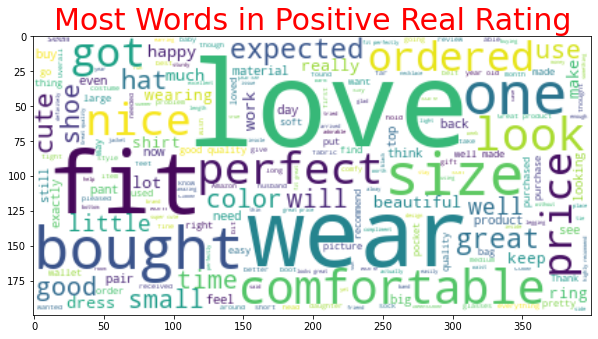

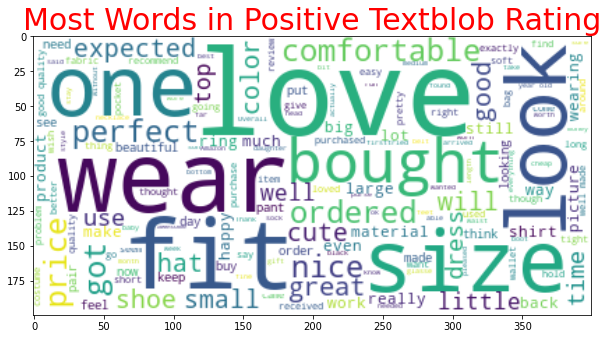

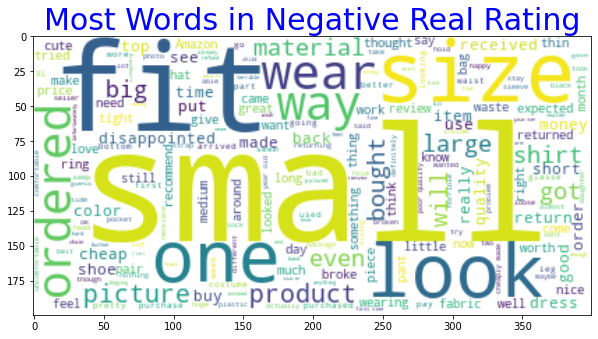

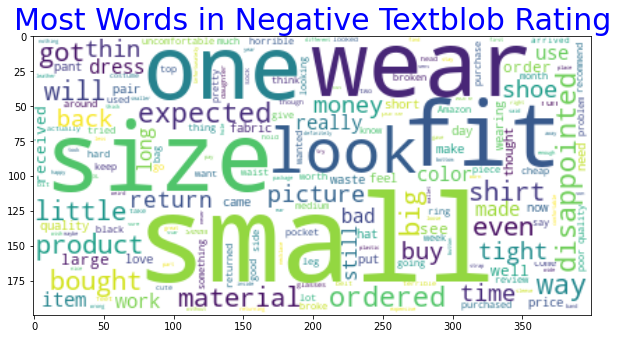

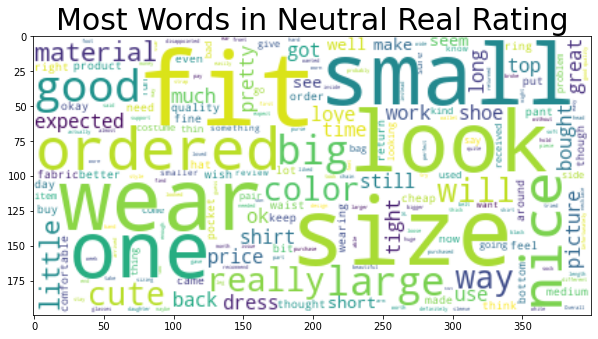

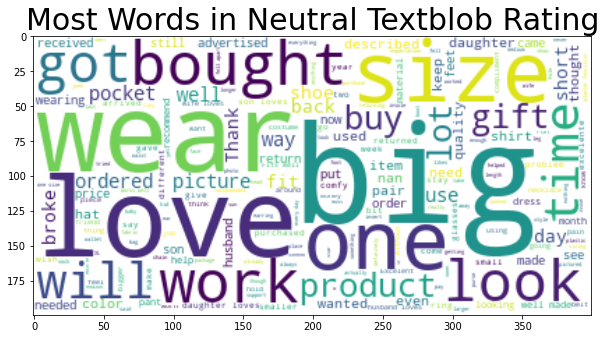

In [ ]:
# Interactive Graphs
df_ten = df_1.loc[:10000]
df_three = df_1.loc[:300000]

ratings = ['Positive', 'Negative', 'Neutral']

fig1 = go.Figure(data=[
    go.Bar(name='Textblob', x=ratings, y=df_ten['Tanalysis'].value_counts()),
    go.Bar(name='Stars', x=ratings, y=df_ten['Stars'].value_counts()),
    go.Bar(name='VADER', x=ratings, y=df_ten['Vanalysis'].value_counts())
])
fig1.update_layout(title='Textblob Analysis vs VADER vs Star Type - 10,000 Rows',
                  xaxis_title = "Rating",
                  yaxis_title = "Count")


fig2 = go.Figure(data=[
    go.Bar(name='Textblob', x=ratings, y=df_three['Tanalysis'].value_counts()),
    go.Bar(name='Stars', x=ratings, y=df_three['Stars'].value_counts()),
    go.Bar(name='VADER', x=ratings, y=df_three['Vanalysis'].value_counts())

])
fig2.update_layout(title='Textblob Analysis vs VADER vs Star Type - 300,000 Rows',
                  xaxis_title = "Rating",
                  yaxis_title = "Count")

# Add dropdown
fig1.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "bar"],
                    label="Bar Graph",
                    method="restyle"
                ),
                dict(
                    args=["type", "line"],
                    label="Line Graph",
                    method="restyle"
                )
            ]),
        ),
    ]
)

fig2.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "bar"],
                    label="Bar Graph",
                    method="restyle"
                ),
                dict(
                    args=["type", "word"],
                    label="Line Graph",
                    method="restyle"
                )
            ]),
        ),
    ]
)
fig1.show()
fig2.show()


df_pos = df_1.loc[df_1['Stars'] == 'Positive']
df_neg = df_1.loc[df_1['Stars'] == 'Negative']
df_neu = df_1.loc[df_1['Stars'] == 'Neutral']
df_pos2 = df_1.loc[df_1['Tanalysis'] == 'Positive']
df_neg2 = df_1.loc[df_1['Tanalysis'] == 'Negative']
df_neu2 = df_1.loc[df_1['Tanalysis'] == 'Neutral']

# Word Graph for Real Positive
pos_text = " ".join(i for i in df_pos['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(label = "Most Words in Positive Real Rating",
          fontsize = 30,
          color = "red")
plt.show()

# Word Graph for Textblob Positive
pos_text2 = " ".join(i for i in df_pos2['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text2)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(label = "Most Words in Positive Textblob Rating",
          fontsize = 30,
          color = "red")
plt.show()

# Word Graph for Real Negative
neg_text = " ".join(i for i in df_neg['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(label = "Most Words in Negative Real Rating",
          fontsize = 30,
          color = "blue")
plt.show()

# Word Graph for Textblob Negative
neg_text2 = " ".join(i for i in df_neg2['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text2)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(label = "Most Words in Negative Textblob Rating",
          fontsize = 30,
          color = "blue")
plt.show()

# Word Graph for Real Neutral
neu_text = " ".join(i for i in df_neu['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(label = "Most Words in Neutral Real Rating",
          fontsize = 30,
          color = "black")
plt.show()

# Word Graph for Textblob Neutral
neu_text2 = " ".join(i for i in df_neu2['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text2)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(label = "Most Words in Neutral Textblob Rating",
          fontsize = 30,
          color = "black")
plt.show()


# Interactive Graph Analysis

We made two bar graphs depicting how many Positive, Negative, and Neutral reviews there were for each predictive NLP analysis. We also included the actual review rating as 'Star Type' to show how accurate Textblob and VADER were in predicting reviews. 

With 10,000 rows, Textblob seemed to overpredict while VADER underpredicted. The Star rating was about an average between the two. We also included a line graph to visually depict how Textblob overpredicts while VADER underpredicts.

However, with 300,000 rows, Textblob seemed to overpredict while VADER was more accurate. There are about the same amount of VADER predictions with the Star rating. Based on this, we can conclude that VADER predicts more accurately with larger datasets.

We also made a word cloud graph which is a great way to visually look at the text data when using natural language processing. We compared the real ratings of positive, negative, and neutral to the Textblob predictions. We wanted to see which words Textblob considered to be most 'positive' compared to what an Amazon reviewer believed their review to be. In both Textblob and the real reviews, the word 'love' and 'wear' seem to have the highest frequency.

Both Textblob and Amazon reviewers showed a high frequency of 'small', 'wear', 'one', 'fit' when identifying a negative review.

Neutral Textblob and real ratings don't seem to have a pattern, but it is interesting to see what Textblob classified as 'Neutral' versus an Amazon reviewer.


# Conclusion
Based on the polarity results and Cohen's Kappa, the predicted ratings of our model displayed a 59% accuracy relative to the actual ratings. We can conclude that Textblob and VADER do not really agree with each other that much. It seems as though where Textblob had more groupings of one review (i.e. - more "Positive"), VADER had less (i.e. - less "Positive"). Using Cohen's Kappa, we can know that using Textblob OR VADER is the best way to predict an Amazon review rating instead of using both.

## Limitations & Future Work

*   The original dataset contained nearly 700,000 reviews of various products. Further testing of our model could be done by expanding the number of reviews analyzed. VADER does better with larger data sets, so if we used a larger dataset, we expect that VADER would be more accurately predictive.
*   Use of the metadata - particularly to divide the reviews based on fashion product type/form could have cleaned the data and given more context of the review.
*   Incorporation of the 'upvote' feature. While provided as an attribute in the dataset, the column was mostly empty. However, using this factor could eventually be used to determine Top Reviews that are indicated to be the most helpful to other consumers.
*   We researched that Knowledge Graphs are a great way to visually depict natural language processing results, so if we had more time we would attempt to create and understand a knowledge graph for our data
*   More interactive graphs - we spent a lot of time attempting to make easy interactive graphs in Python, when we should have been spending more time on the actual data. If we had more time, we would spend it on making visually appealing interactive graphs.
*   ‘Verified’ data could imply the reviews were already divided based on what seemed like legitimate reviews versus fake ones for influencing product ratings.

### Sources


*   https://retailwire.com/discussion/amazon-uses-artificial-intelligence-to-improve-review-rating-system/ 
*   https://www.amazon.com/vine/about 
*   https://towardsdatascience.com/7-nlp-techniques-you-can-easily-implement-with-python-dc0ade1a53c2 
*   https://pub.towardsai.net/textblob-vs-vader-for-sentiment-analysis-using-python-76883d40f9ae 
*   https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524 
*   https://www.quora.com/How-does-Amazon-identify-fake-reviews 






